# Task B - single subject - model ?

## Notebook setup
This first cell contains the parameters that can be tuned for code execution:
- subject: select the subject on which to test the model, between [1,4];
- label: index of feature column to be selected to perform activity detection, between [0,6]. The default value for task B is 6;
- folder: directory name where '.mat' files are stored;
- window_size: parameter that sets the length of temporal windows on which to perform the convolution;
- stride: step length to chose the next window.

In [1]:
subject = 3
label = 6
folder = "../data/full/"
window_size = 15
stride = 5

In [24]:
import preprocessing
import models
import utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

In the following cell, we make use of some functions of Keras which have been removed, but of which the code is still available at https://github.com/keras-team/keras/commit/a56b1a55182acf061b1eb2e2c86b48193a0e88f7. These are used to evaulate the f1 score during training on batches of data: this is only an approximation though, which is the reason why they have been removed.

In [4]:
import os
if not(os.path.exists("./data")):
    os.mkdir("./data")

# One-shot classification
Here classification is performed with null class.
### Preprocessing

In [5]:
X_train, Y_train, X_test, Y_test, n_features, n_classes, class_weights = preprocessing.loadData(subject=subject,
                                                                                                label=label,
                                                                                                folder=folder,
                                                                                                window_size=window_size,
                                                                                                stride=stride,
                                                                                                make_binary=False,
                                                                                                null_class=True,
                                                                                                print_info=False)

Y_train and Y_test contain the correct labels for each signals window. Y_test in particular will be used to evaluate predictions for both this (one-shot) and the two-steps models. For this reason it is here saved with a different name, to avoid having it being overwritten later.

In [6]:
Y_test_true = Y_test

### Model

In [7]:
oneshot_model = models.MotionDetection((window_size, n_features), n_classes, print_info=False)

oneshot_model.compile(optimizer = Adam(lr=0.001),
                      loss = "categorical_crossentropy", 
                      metrics = ["accuracy"])

checkpointer = ModelCheckpoint(filepath='./data/model_BOS_3.hdf5', verbose=1, save_best_only=True)

### Training

In [8]:
X_train.shape

(30017, 15, 110)

In [9]:
oneshot_model.fit(x = X_train, 
                  y = to_categorical(Y_train),
                  epochs = 15,
                  batch_size = 128,
                  verbose = 1,
                  callbacks=[checkpointer],
                  validation_data=(X_test, to_categorical(Y_test)),
                  class_weight=class_weights)

Train on 30017 samples, validate on 9799 samples
Epoch 1/15
30017/30017 [==============================] - 15s 506us/step - loss: 0.7604 - acc: 0.7747 - val_loss: 0.5319 - val_acc: 0.8294

Epoch 00001: val_loss improved from inf to 0.53194, saving model to ./data/model_BOS_3.hdf5
Epoch 2/15
30017/30017 [==============================] - 10s 322us/step - loss: 0.4134 - acc: 0.8607 - val_loss: 0.4999 - val_acc: 0.8418

Epoch 00002: val_loss improved from 0.53194 to 0.49987, saving model to ./data/model_BOS_3.hdf5
Epoch 3/15
30017/30017 [==============================] - 10s 323us/step - loss: 0.3144 - acc: 0.8906 - val_loss: 0.4298 - val_acc: 0.8512

Epoch 00003: val_loss improved from 0.49987 to 0.42975, saving model to ./data/model_BOS_3.hdf5
Epoch 4/15
30017/30017 [==============================] - 10s 324us/step - loss: 0.2547 - acc: 0.9129 - val_loss: 0.4926 - val_acc: 0.8372

Epoch 00004: val_loss did not improve
Epoch 5/15
30017/30017 [==============================] - 10s 326us/s

### Evaluation - passare class_weights a class report

In [13]:
Y_pred = oneshot_model.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93      7668
          1       0.32      0.41      0.36        80
          2       0.59      0.70      0.64        69
          3       0.60      0.56      0.58        32
          4       0.57      0.59      0.58        91
          5       0.89      0.83      0.86        89
          6       0.48      0.32      0.38        69
          7       0.55      0.80      0.65       171
          8       0.79      0.11      0.19       136
          9       0.57      0.40      0.47        97
         10       0.51      0.50      0.50        84
         11       0.57      0.48      0.52        50
         12       0.70      0.79      0.74        72
         13       0.89      0.93      0.91       117
         14       0.79      0.64      0.71        42
         15       0.69      0.53      0.60       285
         16       0.79      0.75      0.77       575
         17       0.34      0.92      0.49   

In [14]:
oneshot_model_best = load_model('./data/model_BOS_3.hdf5')

Y_pred = oneshot_model_best.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92      7668
          1       0.65      0.19      0.29        80
          2       0.47      0.62      0.53        69
          3       0.23      0.34      0.28        32
          4       0.52      0.58      0.55        91
          5       0.67      0.79      0.72        89
          6       0.52      0.46      0.49        69
          7       0.63      0.73      0.67       171
          8       0.91      0.24      0.37       136
          9       0.62      0.27      0.37        97
         10       0.48      0.25      0.33        84
         11       1.00      0.06      0.11        50
         12       0.52      0.65      0.58        72
         13       0.80      0.73      0.76       117
         14       0.35      0.62      0.44        42
         15       0.63      0.65      0.64       285
         16       0.78      0.59      0.67       575
         17       0.32      0.85      0.46   

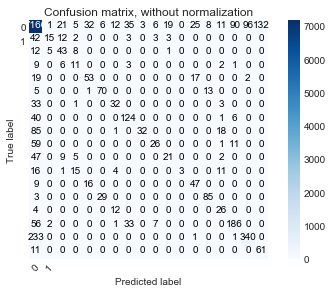

In [28]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

sns.set_style("dark")
plt.figure()
utils.plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Two-steps classification
## Activity detection
This model performs a binary classification.
### Preprocessing

In [29]:
X_train, Y_train, X_test, Y_test, n_features, n_classes, class_weights = preprocessing.loadData(subject=subject,
                                                                                                label=label,
                                                                                                folder=folder,
                                                                                                window_size=window_size,
                                                                                                stride=stride,
                                                                                                make_binary=True,
                                                                                                null_class=True,
                                                                                                print_info=False)

### Model

In [30]:
detection_model = models.MotionDetection((window_size, n_features), n_classes, print_info=False)

detection_model.compile(optimizer = Adam(lr=0.001),
                        loss = "categorical_crossentropy", 
                        metrics = ["accuracy"])

checkpointer = ModelCheckpoint(filepath='./data/model_BTSD_3.hdf5', verbose=1, save_best_only=True)

### Training

In [32]:
detection_model.fit(x = X_train, 
                    y = to_categorical(Y_train), 
                    epochs = 15, 
                    batch_size = 128,
                    verbose = 1,
                    callbacks=[checkpointer],
                    validation_data=(X_test, to_categorical(Y_test)),
                    class_weight=class_weights)

Train on 30017 samples, validate on 9799 samples
Epoch 1/15
30017/30017 [==============================] - 10s 334us/step - loss: 0.3251 - acc: 0.8631 - val_loss: 0.3445 - val_acc: 0.8549

Epoch 00001: val_loss improved from inf to 0.34454, saving model to ./data/model_BTSD_3.hdf5
Epoch 2/15
30017/30017 [==============================] - 10s 324us/step - loss: 0.2464 - acc: 0.9009 - val_loss: 0.2943 - val_acc: 0.8602

Epoch 00002: val_loss improved from 0.34454 to 0.29433, saving model to ./data/model_BTSD_3.hdf5
Epoch 3/15
30017/30017 [==============================] - 10s 325us/step - loss: 0.2109 - acc: 0.9137 - val_loss: 0.2716 - val_acc: 0.8837

Epoch 00003: val_loss improved from 0.29433 to 0.27164, saving model to ./data/model_BTSD_3.hdf5
Epoch 4/15
30017/30017 [==============================] - 10s 325us/step - loss: 0.1818 - acc: 0.9249 - val_loss: 0.2721 - val_acc: 0.8848

Epoch 00004: val_loss did not improve
Epoch 5/15
30017/30017 [==============================] - 10s 325u

### Evaluation

In [33]:
Y_pred = detection_model.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93      7668
          1       0.73      0.78      0.75      2131

avg / total       0.89      0.89      0.89      9799

Weighted f1-score: 0.8910295967336965


In [34]:
detection_model_best = load_model('./data/model_BTSD_3.hdf5')

Y_pred = detection_model_best.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.94      0.91      0.92      7668
          1       0.71      0.78      0.74      2131

avg / total       0.89      0.88      0.89      9799

Weighted f1-score: 0.8853452512584014


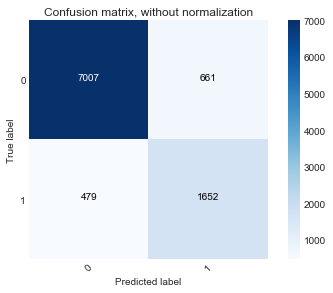

In [35]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

sns.set_style("dark")
plt.figure()
utils.plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [36]:
Y_pred_d = Y_pred

## Activity classification

In [37]:
X_train, Y_train, X_test, Y_test, n_features, n_classes, class_weights = preprocessing.loadData(subject=subject,
                                                                                                label=label,
                                                                                                folder=folder,
                                                                                                window_size=window_size,
                                                                                                stride=stride,
                                                                                                make_binary=False,
                                                                                                null_class=False,
                                                                                                print_info=False)

### Model

In [38]:
classification_model = models.MotionDetection((window_size, n_features), n_classes, print_info=False)

classification_model.compile(optimizer = Adam(lr=0.001),
                             loss = "categorical_crossentropy", 
                             metrics = ["accuracy"])

checkpointer = ModelCheckpoint(filepath='./data/model_BTSC_3.hdf5', verbose=1, save_best_only=True)

### Training

In [39]:
classification_model.fit(x = X_train,
                         y = to_categorical(Y_train), 
                         epochs = 15, 
                         batch_size = 128,
                         verbose = 1,
                         callbacks=[checkpointer],
                         validation_data=(X_test, to_categorical(Y_test)),
                         class_weight=class_weights)

Train on 10242 samples, validate on 2131 samples
Epoch 1/15
10242/10242 [==============================] - 8s 769us/step - loss: 1.1572 - acc: 0.5739 - val_loss: 1.3308 - val_acc: 0.5805

Epoch 00001: val_loss improved from inf to 1.33077, saving model to ./data/model_BTSC_3.hdf5
Epoch 2/15
10242/10242 [==============================] - 3s 320us/step - loss: 0.6284 - acc: 0.7599 - val_loss: 1.2038 - val_acc: 0.6598

Epoch 00002: val_loss improved from 1.33077 to 1.20385, saving model to ./data/model_BTSC_3.hdf5
Epoch 3/15
10242/10242 [==============================] - 3s 319us/step - loss: 0.4917 - acc: 0.8116 - val_loss: 1.0903 - val_acc: 0.6715

Epoch 00003: val_loss improved from 1.20385 to 1.09033, saving model to ./data/model_BTSC_3.hdf5
Epoch 4/15
10242/10242 [==============================] - 3s 319us/step - loss: 0.3787 - acc: 0.8619 - val_loss: 1.0866 - val_acc: 0.7184

Epoch 00004: val_loss improved from 1.09033 to 1.08657, saving model to ./data/model_BTSC_3.hdf5
Epoch 5/15


### Evaluation

In [42]:
Y_pred = classification_model.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.55      0.44      0.49        80
          1       0.78      0.78      0.78        69
          2       0.36      0.53      0.43        32
          3       0.80      0.52      0.63        91
          4       0.74      0.62      0.67        89
          5       0.69      0.64      0.66        69
          6       0.50      0.75      0.60       171
          7       0.92      0.81      0.86       136
          8       0.36      0.63      0.46        97
          9       0.69      0.77      0.73        84
         10       0.57      0.32      0.41        50
         11       0.59      0.85      0.70        72
         12       0.74      0.88      0.80       117
         13       0.44      0.67      0.53        42
         14       0.82      0.62      0.71       285
         15       0.93      0.82      0.87       575
         16       0.98      0.88      0.93        72

avg / total       0.76      0.72      0.73  

In [43]:
classification_model_best = load_model('./data/model_BTSC_3.hdf5')

Y_pred = classification_model_best.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.42      0.46      0.44        80
          1       0.57      0.70      0.63        69
          2       0.28      0.53      0.37        32
          3       0.68      0.16      0.27        91
          4       0.65      0.38      0.48        89
          5       0.53      0.64      0.58        69
          6       0.56      0.68      0.62       171
          7       0.95      0.90      0.92       136
          8       0.51      0.51      0.51        97
          9       0.69      0.60      0.64        84
         10       0.54      0.42      0.47        50
         11       0.52      0.90      0.66        72
         12       0.64      0.94      0.76       117
         13       0.44      0.60      0.51        42
         14       0.80      0.68      0.74       285
         15       0.98      0.89      0.93       575
         16       0.91      1.00      0.95        72

avg / total       0.74      0.72      0.72  

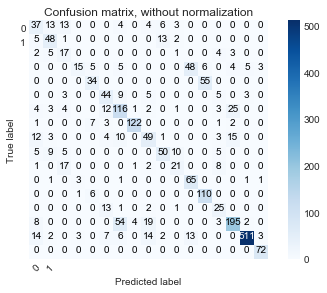

In [44]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

sns.set_style("dark")
plt.figure()
utils.plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

## Cascade of detection and classification
The labels that have to be used for assessment are saved in Y_test_true. The labels predicted by the detection_model are saved instead in Y_pred_d.

In [45]:
print(Y_test_true.shape, Y_pred_d.shape)

(9799,) (9799,)


In [46]:
X_train, Y_train, X_test, Y_test, n_features, n_classes, class_weights = preprocessing.loadData(subject=subject,
                                                                                                label=label,
                                                                                                folder=folder,
                                                                                                window_size=window_size,
                                                                                                stride=stride,
                                                                                                make_binary=True,
                                                                                                null_class=True,
                                                                                                print_info=False)

In [47]:
mask = (Y_pred_d == 1)
X_detected = X_test[mask, :, :]
Y_pred_c = classification_model_best.predict_classes(X_detected)
Y_pred_d[mask] = Y_pred_c

In [48]:
print(classification_report(Y_test_true, Y_pred_d))
print("Weighted f1-score:", f1_score(Y_test_true, Y_pred_d, average='weighted'))

             precision    recall  f1-score   support

          0       0.93      0.92      0.92      7668
          1       0.08      0.10      0.09        80
          2       0.01      0.01      0.01        69
          3       0.00      0.00      0.00        32
          4       0.09      0.05      0.07        91
          5       0.00      0.00      0.00        89
          6       0.01      0.03      0.01        69
          7       0.00      0.00      0.00       171
          8       0.00      0.00      0.00       136
          9       0.00      0.00      0.00        97
         10       0.21      0.11      0.14        84
         11       0.00      0.00      0.00        50
         12       0.00      0.00      0.00        72
         13       0.00      0.00      0.00       117
         14       0.00      0.00      0.00        42
         15       0.00      0.00      0.00       285
         16       0.00      0.00      0.00       575
         17       0.00      0.00      0.00   

C:\Users\Riccardo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Riccardo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


One-shot classification instead had:

In [49]:
X_train, Y_train, X_test, Y_test, n_features, n_classes, class_weights = preprocessing.loadData(subject=subject,
                                                                                                label=label,
                                                                                                folder=folder,
                                                                                                window_size=window_size,
                                                                                                stride=stride,
                                                                                                make_binary=False,
                                                                                                null_class=True,
                                                                                                print_info=False)

In [50]:
oneshot_model_best = load_model('./data/model_BOS_3.hdf5')

Y_pred = oneshot_model_best.predict_classes(X_test)
print(classification_report(Y_test, Y_pred))
print("Weighted f1-score:", f1_score(Y_test, Y_pred, average='weighted'))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92      7668
          1       0.65      0.19      0.29        80
          2       0.47      0.62      0.53        69
          3       0.23      0.34      0.28        32
          4       0.52      0.58      0.55        91
          5       0.67      0.79      0.72        89
          6       0.52      0.46      0.49        69
          7       0.63      0.73      0.67       171
          8       0.91      0.24      0.37       136
          9       0.62      0.27      0.37        97
         10       0.48      0.25      0.33        84
         11       1.00      0.06      0.11        50
         12       0.52      0.65      0.58        72
         13       0.80      0.73      0.76       117
         14       0.35      0.62      0.44        42
         15       0.63      0.65      0.64       285
         16       0.78      0.59      0.67       575
         17       0.32      0.85      0.46   

# end